In [2]:
import sys
from pathlib import Path

p = Path.cwd().resolve()
repo_root = next((parent for parent in [p] + list(p.parents) if (parent / ".git").exists()), None)
if repo_root is None:
    raise RuntimeError("Repo root not found. Open the repo folder in VS Code.")

sys.path.insert(0, str(repo_root))
print("Repo root:", repo_root)

Repo root: /Users/samiullah/Group_Project_Y3


/usr/local/bin/python3 -m pip install [pckg]

In [3]:
import pandas as pd
import numpy as np

# Construct matrix of county-county flows

In [4]:
county_commuting = pd.read_csv(f"{str(repo_root)}/cleaned/00_commuting_data/county_commuting.csv")

In [5]:
county_econ_activity = pd.read_csv(f"{str(repo_root)}/cleaned/00_econ_activity_data/county_econ_activity.csv")

In [6]:
county_econ_activity # some (4) incomplete but matches to the muni's for which there is commuting data anyway

,county_code,econ_active_population
0,201,45666.0
1,202,45049.0
2,203,36610.0
3,204,25438.0
4,205,24914.0
...,...,...
375,3217,27376.0
376,3218,26202.0
377,3261,46947.0
378,3262,187291.0


In [7]:
county_commuting_prop = county_commuting.merge(county_econ_activity.rename(columns={'county_code':'county_code_residence'}))

In [8]:
county_commuting_prop['commuters_prop'] = county_commuting_prop['commuters'] / county_commuting_prop['econ_active_population']

In [9]:
county_commuting_prop

,county_code_residence,county_code_labour,commuters,econ_active_population,commuters_prop
0,201.0,201,8002.0,45666.0,0.175229
1,201.0,203,31.0,45666.0,0.000679
2,201.0,205,12.0,45666.0,0.000263
3,201.0,209,664.0,45666.0,0.014540
4,201.0,210,243.0,45666.0,0.005321
...,...,...,...,...,...
16246,3263.0,3214,9.0,17863.0,0.000504
16247,3263.0,3215,4.0,17863.0,0.000224
16248,3263.0,3218,4.0,17863.0,0.000224
16249,3263.0,3261,9.0,17863.0,0.000504


In [10]:
# Rows correspond to 'from' county, columns to 'to' county
# If missing flows, assumed to be zero

matrix = county_commuting_prop.pivot(
    index="county_code_residence",
    columns="county_code_labour",
    values="commuters_prop"
).fillna(0)

# Proportion that stays within county is 1 - sum of off-diagonal proportions
# In raw data; did not have within-muni flows so within-county flows would be sum of within-county but not within-muni flows, so less than true

row_sum_offdiag = matrix.sum(axis=1) - pd.Series(
    np.diag(matrix),
    index=matrix.index
)

for i in matrix.index:
    matrix.loc[i, i] = 1 - row_sum_offdiag.loc[i]

matrix

county_code_labour,201,202,203,204,205,206,207,208,209,210,...,3212,3213,3214,3215,3216,3217,3218,3261,3262,3263
county_code_residence,,,,,,,,,,,,,,,,,,,,,
201.0,0.916021,0.000000,0.000679,0.000000,0.000263,0.000000,0.000000,0.000000,0.014540,0.005321,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000088,0.000000
202.0,0.000133,0.845657,0.000200,0.000000,0.000089,0.000000,0.000000,0.001931,0.000355,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000089,0.000000
203.0,0.000519,0.000000,0.770309,0.000738,0.000300,0.000000,0.000000,0.000000,0.000574,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000273,0.000000
204.0,0.000000,0.000000,0.012383,0.874322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000118,0.000000
205.0,0.000522,0.000000,0.000361,0.000201,0.800795,0.008991,0.004134,0.000000,0.024324,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000183,0.000402,0.927528,0.000000,0.000548,0.004931,0.000146
3218.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.009350,0.000267,0.002710,0.000000,0.921838,0.000458,0.021296,0.000649
3261.0,0.000000,0.000000,0.000170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.003089,0.000107,0.001150,0.000596,0.000128,0.000064,0.908919,0.003536,0.000149


# Symmetrise the matrix

Functional LMs reflect muutal integration and not directional flows. Community-detection algorithms operate on undirected graphs.

In [11]:
W = (matrix @ matrix.T).copy()
W = W.mask(np.eye(len(W), dtype=bool), 0)

# Run Leidens Algorithm

In [12]:
import igraph as ig
import leidenalg

g = ig.Graph.Weighted_Adjacency(
    W.values.tolist(),
    mode="UNDIRECTED",
    attr="weight",
    loops=False
)

part = leidenalg.find_partition(
    g,
    leidenalg.RBConfigurationVertexPartition,
    weights="weight",
    resolution_parameter=10  # KEY VARIABLE
)

lm_labels = pd.Series(part.membership, index=W.index, name="lm_id")
print('Num LMs:', lm_labels.nunique())

Num LMs: 78


In [13]:
county_lm = lm_labels.reset_index().rename(columns={"county_code_residence": "county_code"})
county_lm

,county_code,lm_id
0,201.0,23
1,202.0,4
2,203.0,16
3,204.0,26
4,205.0,16
...,...,...
375,3217.0,32
376,3218.0,3
377,3261.0,13
378,3262.0,3


# Graphically

<Axes: >

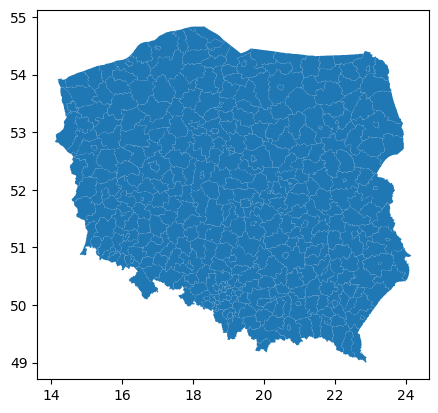

In [14]:
import geopandas as gpd

path = f"{str(repo_root)}/shape/county/A02_Granice_powiatow.shp"
county = gpd.read_file(path)

county.head()

county.plot()

In [15]:
county['county_code'] = county['JPT_KOD_JE'].astype(int)
county_with_lm = county.merge(county_lm, on ='county_code', how='inner')

In [16]:
county_with_lm

,JPT_KOD_JE,JPT_SJR_KO,JPT_NAZWA_,JPT_POWIER,JPT_ORGAN_,JPT_KOD__1,JPT_NAZWA1,JPT_ORGAN1,JPT_WAZNA_,IIP_PRZEST,...,WAZNY_DO,IIP_WERSJA,JPT_OPIS,JPT_ID,REGON,Shape_Leng,Shape_Area,geometry,county_code,lm_id
0,0401,POW,powiat aleksandrowski,47461.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2025-11-18T12:31:44,None,2788941.0,91086647100000,1.779400,0.063230,"POLYGON ((18.54317 52.8327, 18.54379 52.83357,...",401,33
1,2001,POW,powiat augustowski,165937.0,None,None,None,NZN,BRK,PL.PZGIK.200,...,None,2025-07-28T11:28:05,None,2778253.0,79067090600000,3.720677,0.226346,"POLYGON ((23.23399 53.95638, 23.23748 53.95596...",2001,12
2,2801,POW,powiat bartoszycki,130744.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2025-07-28T11:28:04,None,2778227.0,51074243900000,3.243873,0.180193,"POLYGON ((20.82502 54.3601, 20.82502 54.3601, ...",2801,1
3,1001,POW,powiat bełchatowski,96761.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2025-10-07T13:11:56,None,2783713.0,59064842200000,2.700960,0.124865,"POLYGON ((19.25694 51.51938, 19.25696 51.51947...",1001,14
4,2401,POW,powiat będziński,36431.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2026-01-29T13:43:40,None,10002121.0,27625494000000,2.026355,0.046071,"MULTIPOLYGON (((19.35206 50.26668, 19.35211 50...",2401,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0419,POW,powiat żniński,98481.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2025-11-18T12:31:44,None,2788944.0,09235116200000,3.156751,0.131277,"POLYGON ((17.87002 52.73893, 17.87015 52.73871...",419,21
376,2479,POW,powiat Żory,6463.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2026-01-29T13:43:40,None,10002126.0,brak,0.636158,0.008111,"MULTIPOLYGON (((18.65677 50.08126, 18.65696 50...",2479,11
377,1437,POW,powiat żuromiński,80659.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2025-07-28T11:28:05,None,2778257.0,13037775800000,2.557958,0.108028,"POLYGON ((19.91418 52.90529, 19.90617 52.90692...",1437,42
378,1438,POW,powiat żyrardowski,53254.0,None,None,None,NZN,NZN,PL.PZGIK.200,...,None,2026-01-29T13:43:40,None,10002109.0,75014782800000,2.073430,0.069695,"POLYGON ((20.39367 52.13223, 20.39344 52.1327,...",1438,66


<Axes: >

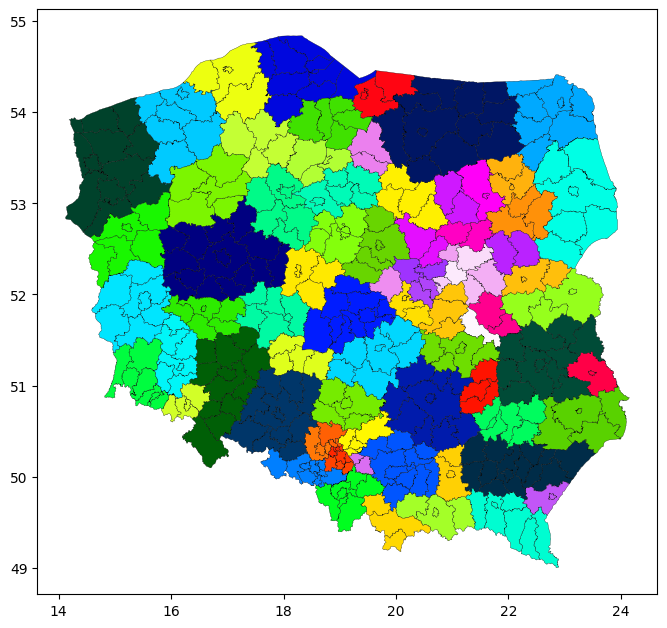

In [17]:
county_with_lm.plot(
    column="lm_id",
    cmap="gist_ncar",
    linewidth=0.2,
    edgecolor="black",
    figsize=(8, 10)
)

In [18]:
county_lm.to_csv(f"{str(repo_root)}/cleaned/00_labour_markets/county_lm.csv", index=False)

<Axes: >

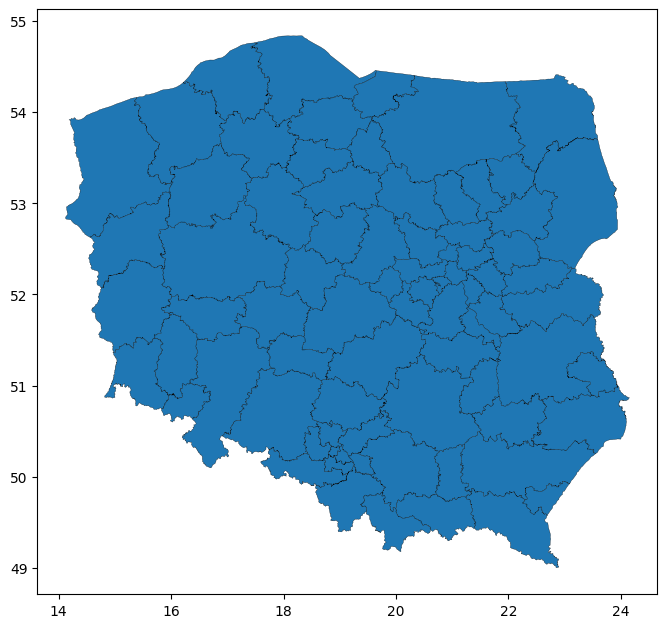

In [20]:
import geopandas as gpd

# ensure same CRS
county_with_lm = county_with_lm.to_crs(county_with_lm.crs)

# dissolve counties into LM polygons
lm_gdf = (
    county_with_lm[['lm_id', 'geometry']]
    .dissolve(by='lm_id', as_index=False)   # unions geometries within each lm_id
)

# optional: fix slivers / invalid geoms
lm_gdf['geometry'] = lm_gdf.buffer(0)

# write shapefile (creates several files: .shp/.shx/.dbf/.prj)
out_path = f"{str(repo_root)}/shape/lm/lm_polygon.shp"
lm_gdf.to_file(out_path)

lm_gdf.plot(linewidth=0.2, edgecolor="black", figsize=(8,10))

ls -lh path/to/notebook.ipynb

In [ ]:
print('ch')

Change with constraint